# Explaining Models with Shap
- Kevin Barnett
- 06/15/2023

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import joblib
import shap

# Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

## Functions

In [2]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    # Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

## Load Saved Joblib Models

In [3]:
# Load saved joblib file with best models
loaded_joblib = joblib.load('project_1_best_models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

In [4]:
# Slice ou diction keys as varibales
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
dec_tree = loaded_joblib['DecisionTreeRegressor']

In [5]:
# Fit model, evaluate, and visual top 5 important features
dec_tree.fit(X_train_df,y_train)
evaluate_regression(dec_tree, X_train_df, y_train, X_test_df,y_test)

Split,R^2,MAE,RMSE
Train,1.00,0.00,0.00
Test,0.19,"1,042.57","1,492.13"


In [6]:
feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.Series(dec_tree.feature_importances_, index=feature_names,
                        name='Feature Importances')
feature_importance.head()

Item_Weight                  0.036755
Item_Visibility              0.112919
Item_MRP                     0.455615
Outlet_Establishment_Year    0.039502
Item_Fat_Content_Regular     0.006613
Name: Feature Importances, dtype: float64

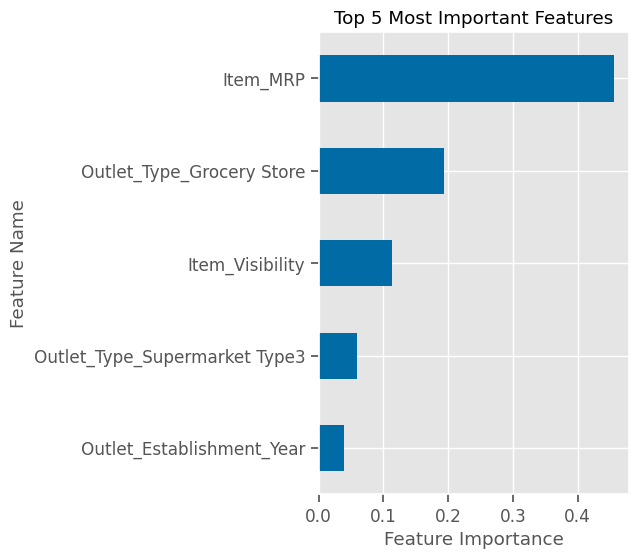

In [7]:
ax = feature_importance.sort_values().tail(5).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 5 Most Important Features');

In [8]:
# Initialize javascriipt
shap.initjs()

## SHAP Bar Summary Plot

In [9]:
# Create SHAP explainer
explainer = shap.Explainer(dec_tree)
explainer

In [10]:
# Get SHAP values
shap_values = explainer(X_train_df, y_train)
type(shap_values)

shap._explanation.Explanation

In [11]:
shap_values.shape

(6392, 31)

In [12]:
# Create dataframe with SHAP values
pd.DataFrame(shap_values.values, columns = X_train_df.columns)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Large,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-923.905753,-442.488899,601.731314,-777.962768,-3.928259,-0.626621,-4.649417,-0.654811,-5.362032,21.023513,...,-1.398213,-31.113472,0.646652,-23.418728,-6.697093,-3.050182,228.834902,-38.617996,-8.141769,-281.370695
1,463.797829,-265.946441,928.350793,-10.995466,20.071734,0.358083,-0.913134,-1.486100,-7.221504,5.540346,...,-1.013676,-5.578378,-0.638698,-3.213228,-13.509004,-3.786583,301.030092,-401.864906,-6.828346,-276.684151
2,-590.393172,-273.248353,286.164700,-31.956019,13.012222,-0.280777,-1.454300,0.501076,-3.197414,4.469494,...,-1.881148,-4.671534,-3.643765,-47.556572,-4.100308,1.267772,251.312627,6.732749,8.597402,-169.465932
3,-15.973313,3.802553,-1022.118023,-11.655507,-26.385835,23.528143,-2.215356,1.786833,-3.903313,-1.751112,...,4.254676,1.444293,9.608830,-2.416288,6.672165,1.402591,202.176293,6.255831,0.797749,-52.973778
4,232.366667,-146.597865,-443.688823,-175.016885,-105.662530,0.046606,-0.009053,0.017293,-2.964932,-13.139886,...,-5.614481,-10.341952,-27.393017,16.448775,-1.293813,3.178662,235.677471,4.100464,1.652683,-48.090423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,3.641391,199.117787,35.225984,-39.062751,6.612211,-0.663892,-1.816444,-0.329603,-2.264240,-0.012455,...,-1.635984,-4.549918,-0.802367,-2.983233,-4.326049,-1.701427,-1961.770630,-172.105043,0.383965,-39.518084
6388,-166.110153,9.054643,-797.415682,-155.492974,-18.807172,-0.953403,-1.022931,-0.136642,13.612238,0.181123,...,0.720087,-6.499367,-6.304491,12.939834,-1.964393,1.426884,205.736094,-9.211546,1.336124,-59.327495
6389,-17.002250,555.903149,2712.665412,292.669384,-25.957184,-0.489756,-1.768828,-0.153831,-3.154948,1.178029,...,261.546192,-13.599417,-3.377512,-5.582857,4.939344,0.170276,443.581019,10.720316,1.290132,-95.878260
6390,136.801062,-395.152884,-491.800906,-27.487754,56.698488,-0.723607,-2.640798,-0.189343,-3.639826,2.355477,...,1.296435,-10.173512,-17.445917,-7.070394,8.039187,7.413599,218.226814,-59.290073,0.650759,-52.565399


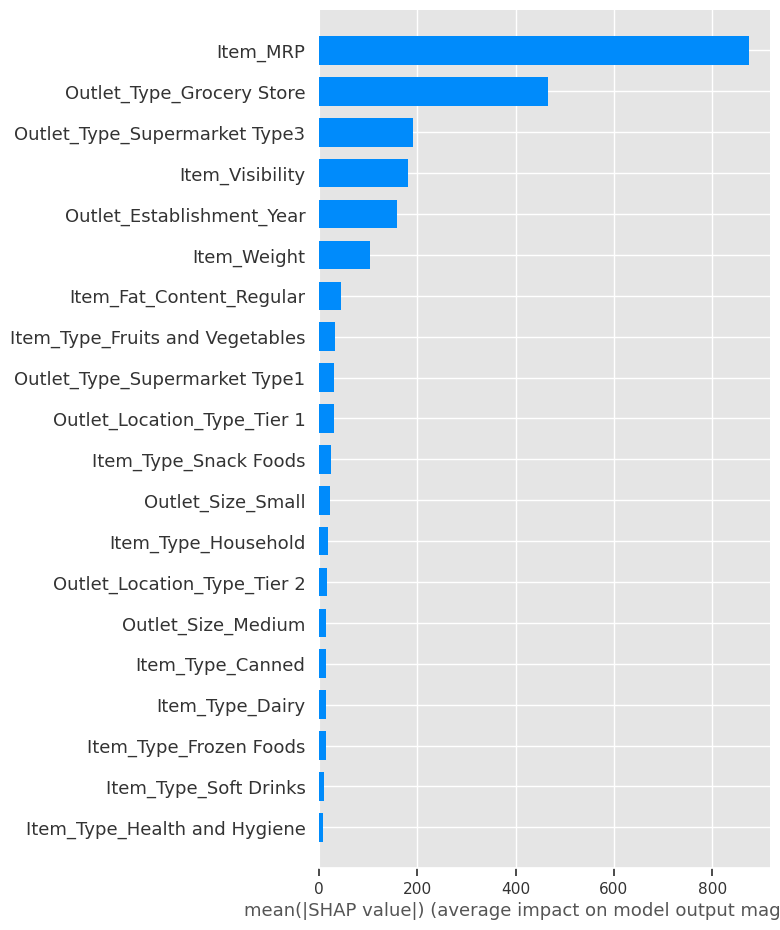

<Figure size 640x480 with 0 Axes>

In [13]:
shap.summary_plot(shap_values,features= X_train_df, plot_type='bar')
plt.savefig('summary_plot_bar.png')

![](dec_tree_features.png)

- Top 5 features in SHAP summary:
 - Item_MRP
 - Outlet_Type_Grocery Store
 - Outlet_type_Supermarket3
 - Item_Visibility
 - Outlet_Establishment_Year
 
- Top 5 features in feature importances:
 - Item_MRP
 - Outlet_Type_Grocery Store
 - Item_Visibility
 - Outlet_type_Supermarket3
 - Outlet_Establishment_Year
 
 > Both the SHAP explainer summary plot and the feature importances plot contained the same top 5 features. The only difference is that in the SHAP summary Item_visibility was the 4th most important feature and in the feature importances Item_visibility was the 3rd most important feature.

## Shap Dot Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


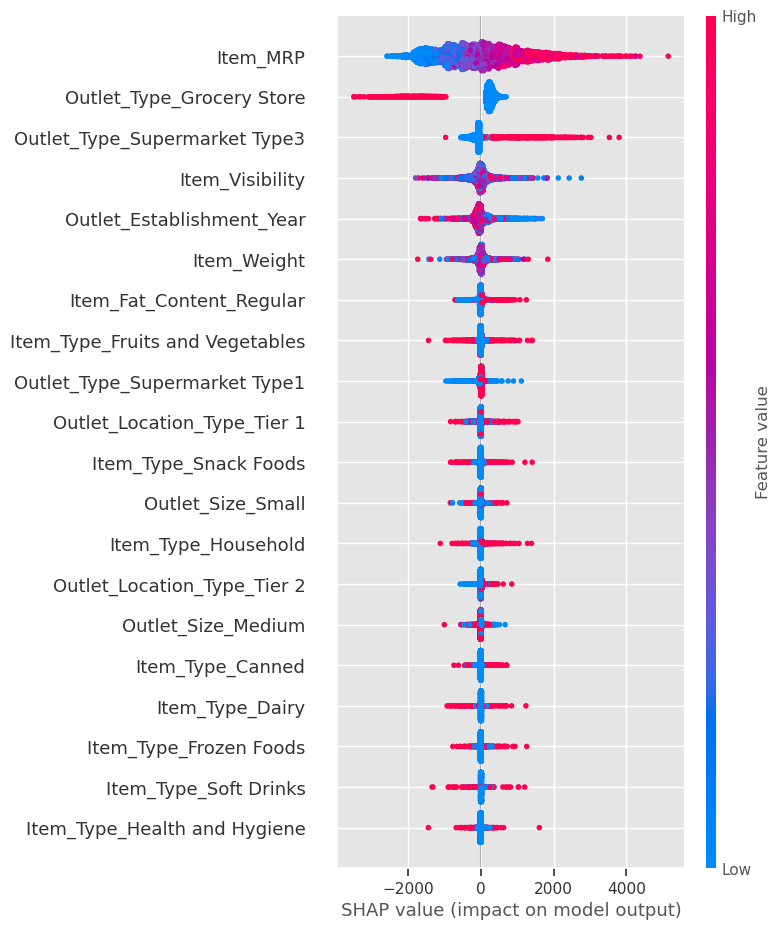

<Figure size 640x480 with 0 Axes>

In [15]:
shap.summary_plot(shap_values, X_train_df);
plt.savefig('summary_plot_dot.png')

- Item_MRP:
 - Lower Item_MRP values produce less sales and higher Item_MRP values produce more sales.
- Outlet_Type_Grocery Store:
 - Outlet types that are grocery stores have a negative impact on sales. Sales are higher if the outlet type is not a grocery store.
- Outlet_Type_Supermarket Type3:
 - Sales are generally higher for outlet types of supermarket 3. However, if the outlet type is not supermarket 3 there is little to no negative effect on sales.